# EDA

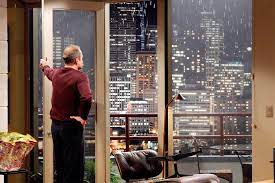

In [241]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime, date, time, timedelta


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [242]:
# import raw data
df_kc_housing_raw = pd.read_csv('data/King_County_House_prices_dataset.csv')

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1) 

In [243]:
# first overview of data
df_kc_housing_raw.shape


(21597, 21)

In [244]:
df_kc_housing_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [245]:
df_kc_housing_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [246]:
df_kc_housing_raw.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,3,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,3,7,1020,0.0,2008,0.000,98144,47.594,-122.299,1020,1357


In [247]:
df_kc_housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [248]:
df_kc_housing_raw.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4580474287.771,NaN,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,NaN,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,NaN,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,NaN,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,NaN,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,NaN,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,NaN,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,NaN,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,NaN,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,NaN,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,NaN,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,NaN,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000


To Do:
- change date to pd.date-format holding month and year
- change yr_built to pd.date
- clean col 13 (sqrft_basement) to hold floats
- change sqft to sqm 
- pick grade or condition to assess condition based on correlation between them
- if grade, change column 11 'grade' to 1-5 scale 
- construct price/sqm column
- categorize zip-codes to neighborhood types somehow
- outliers: price, bedrooms, bathrooms, sqft_living, sqft_lot
- check for duplicates
- check for missing values



In [249]:
# check for duplicates

df_kc_housing_raw.duplicated().value_counts()

# the data set hold no duplicates

False    21597
dtype: int64

In [250]:
# check data types for entries to clean numeric data in columns
df_kc_housing_raw.dtypes

# date and sqft_basement need to be converted to numeric data types

id               int64  
date             object 
price            float64
bedrooms         int64  
bathrooms        float64
sqft_living      int64  
sqft_lot         int64  
floors           float64
waterfront       float64
view             float64
condition        int64  
grade            int64  
sqft_above       int64  
sqft_basement    object 
yr_built         int64  
yr_renovated     float64
zipcode          int64  
lat              float64
long             float64
sqft_living15    int64  
sqft_lot15       int64  
dtype: object

In [251]:
# deep copy of the df to be cleaned and processed df:

df_kc_housing = df_kc_housing_raw.copy(deep=True)

In [252]:
# check data type in raw df for first entry in column 'date' 
type(df_kc_housing['date'][0])

# convert string to timestamp format
df_kc_housing['date'] = pd.to_datetime(df_kc_housing['date'], format='%m/%d/%Y')

# check data type to control
type(df_kc_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [253]:
# create a column with month and year of property selling
df_kc_housing['date_sold'] = pd.to_datetime(df_kc_housing['date']).dt.to_period('M')

In [254]:
# drop property selling date column
df_kc_housing = df_kc_housing.drop('date', axis=1)

In [255]:
# cleaning column sqft_basement 

# first attempt to convert column entries to float
df_kc_housing = df_kc_housing.astype({'sqft_basement': float})

ValueError: could not convert string to float: '?'

In [256]:
# find '?'-character in sqft_basement column
df_kc_housing.query('sqft_basement == "?"')
#replace the `?`-character with a numpy NaN value
df_kc_housing['sqft_basement'] = df_kc_housing.sqft_basement.replace('?',np.NaN)
# change data type to float
df_kc_housing = df_kc_housing.astype({'sqft_basement': float})
df_kc_housing.sqft_basement.dtypes

dtype('float64')

In [257]:
# convert square feet to square meter in column square feet living:

df_kc_housing['sqft_living'] = df_kc_housing.sqft_living.apply(lambda x: x/10.764)
df_kc_housing = df_kc_housing.astype({'sqft_living': int})
df_kc_housing = df_kc_housing.rename({'sqft_living':'sqm_living'},axis=1)


In [258]:
df_kc_housing.head()

,id,price,bedrooms,bathrooms,sqm_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_sold
0,7129300520,221900.000,3,1.000,109,5650,1.000,NaN,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650,2014-10
1,6414100192,538000.000,3,2.250,238,7242,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639,2014-12
2,5631500400,180000.000,2,1.000,71,10000,1.000,0.000,0.000,3,6,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062,2015-02
3,2487200875,604000.000,4,3.000,182,5000,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000,2014-12
4,1954400510,510000.000,3,2.000,156,8080,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503,2015-02


In [259]:
# convert square feet to square meter in column square feet lot:

df_kc_housing['sqft_lot'] = df_kc_housing.sqft_lot.apply(lambda x: x/10.764)
df_kc_housing = df_kc_housing.astype({'sqft_lot': int})
df_kc_housing = df_kc_housing.rename({'sqft_lot':'sqm_lot'},axis=1)

In [260]:
df_kc_housing.head()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_sold
0,7129300520,221900.000,3,1.000,109,524,1.000,NaN,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650,2014-10
1,6414100192,538000.000,3,2.250,238,672,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639,2014-12
2,5631500400,180000.000,2,1.000,71,929,1.000,0.000,0.000,3,6,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062,2015-02
3,2487200875,604000.000,4,3.000,182,464,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000,2014-12
4,1954400510,510000.000,3,2.000,156,750,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503,2015-02


In [261]:
# convert square feet to square meter in columns square feet living 15 and sqaure feet lot 15:

df_kc_housing['sqft_lot15'] = df_kc_housing.sqft_lot15.apply(lambda x: x/10.764)
df_kc_housing = df_kc_housing.astype({'sqft_lot15': int})
df_kc_housing = df_kc_housing.rename({'sqft_lot15':'sqm_lot15'},axis=1)

df_kc_housing['sqft_living15'] = df_kc_housing.sqft_living15.apply(lambda x: x/10.764)
df_kc_housing = df_kc_housing.astype({'sqft_living15': int})
df_kc_housing = df_kc_housing.rename({'sqft_living15':'sqm_living15'},axis=1)



In [262]:
# I will not work with columns sqft_above and sqft_basement but use sqm_living and sqm_lot instead, so I am dropping these columns.
df_kc_housing = df_kc_housing.drop('sqft_above', axis=1)
df_kc_housing = df_kc_housing.drop('sqft_basement', axis=1)

In [263]:
# also dropping latitude, longitude data, view and id
df_kc_housing = df_kc_housing.drop('lat', axis=1)
df_kc_housing = df_kc_housing.drop('long', axis=1)
df_kc_housing = df_kc_housing.drop('view', axis=1)
df_kc_housing = df_kc_housing.drop('id', axis=1)

In [264]:
df_kc_housing.grade.describe()

count   21597.000
mean    7.658    
std     1.173    
min     3.000    
25%     7.000    
50%     7.000    
75%     8.000    
max     13.000   
Name: grade, dtype: float64

In [265]:
# creating a likert-scale of 'grade' to match the scale of 'condition' 
df_kc_housing['grade'] = df_kc_housing['grade'].map({
    3:1,
    4:1, 
    5:2,
    6:2,
    7:3,
    8:3,  
    9:3,
    10:4,
    11:4,
    12:5, 
    13:5
    })

# rename column 'grade' to 'construction'
df_kc_housing = df_kc_housing.rename({'grade':'construction'},axis=1)

df_kc_housing.construction.unique()

array([3, 2, 4, 5, 1])

In [266]:
df_kc_housing.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,condition,construction,yr_built,yr_renovated,zipcode,sqm_living15,sqm_lot15,date_sold
0,221900.000,3,1.000,109,524,1.000,NaN,3,3,1955,0.000,98178,124,524,2014-10
1,538000.000,3,2.250,238,672,2.000,0.000,3,3,1951,1991.000,98125,157,709,2014-12
2,180000.000,2,1.000,71,929,1.000,0.000,3,2,1933,NaN,98028,252,748,2015-02
3,604000.000,4,3.000,182,464,1.000,0.000,5,3,1965,0.000,98136,126,464,2014-12
4,510000.000,3,2.000,156,750,1.000,0.000,3,3,1987,0.000,98074,167,697,2015-02


<AxesSubplot:>

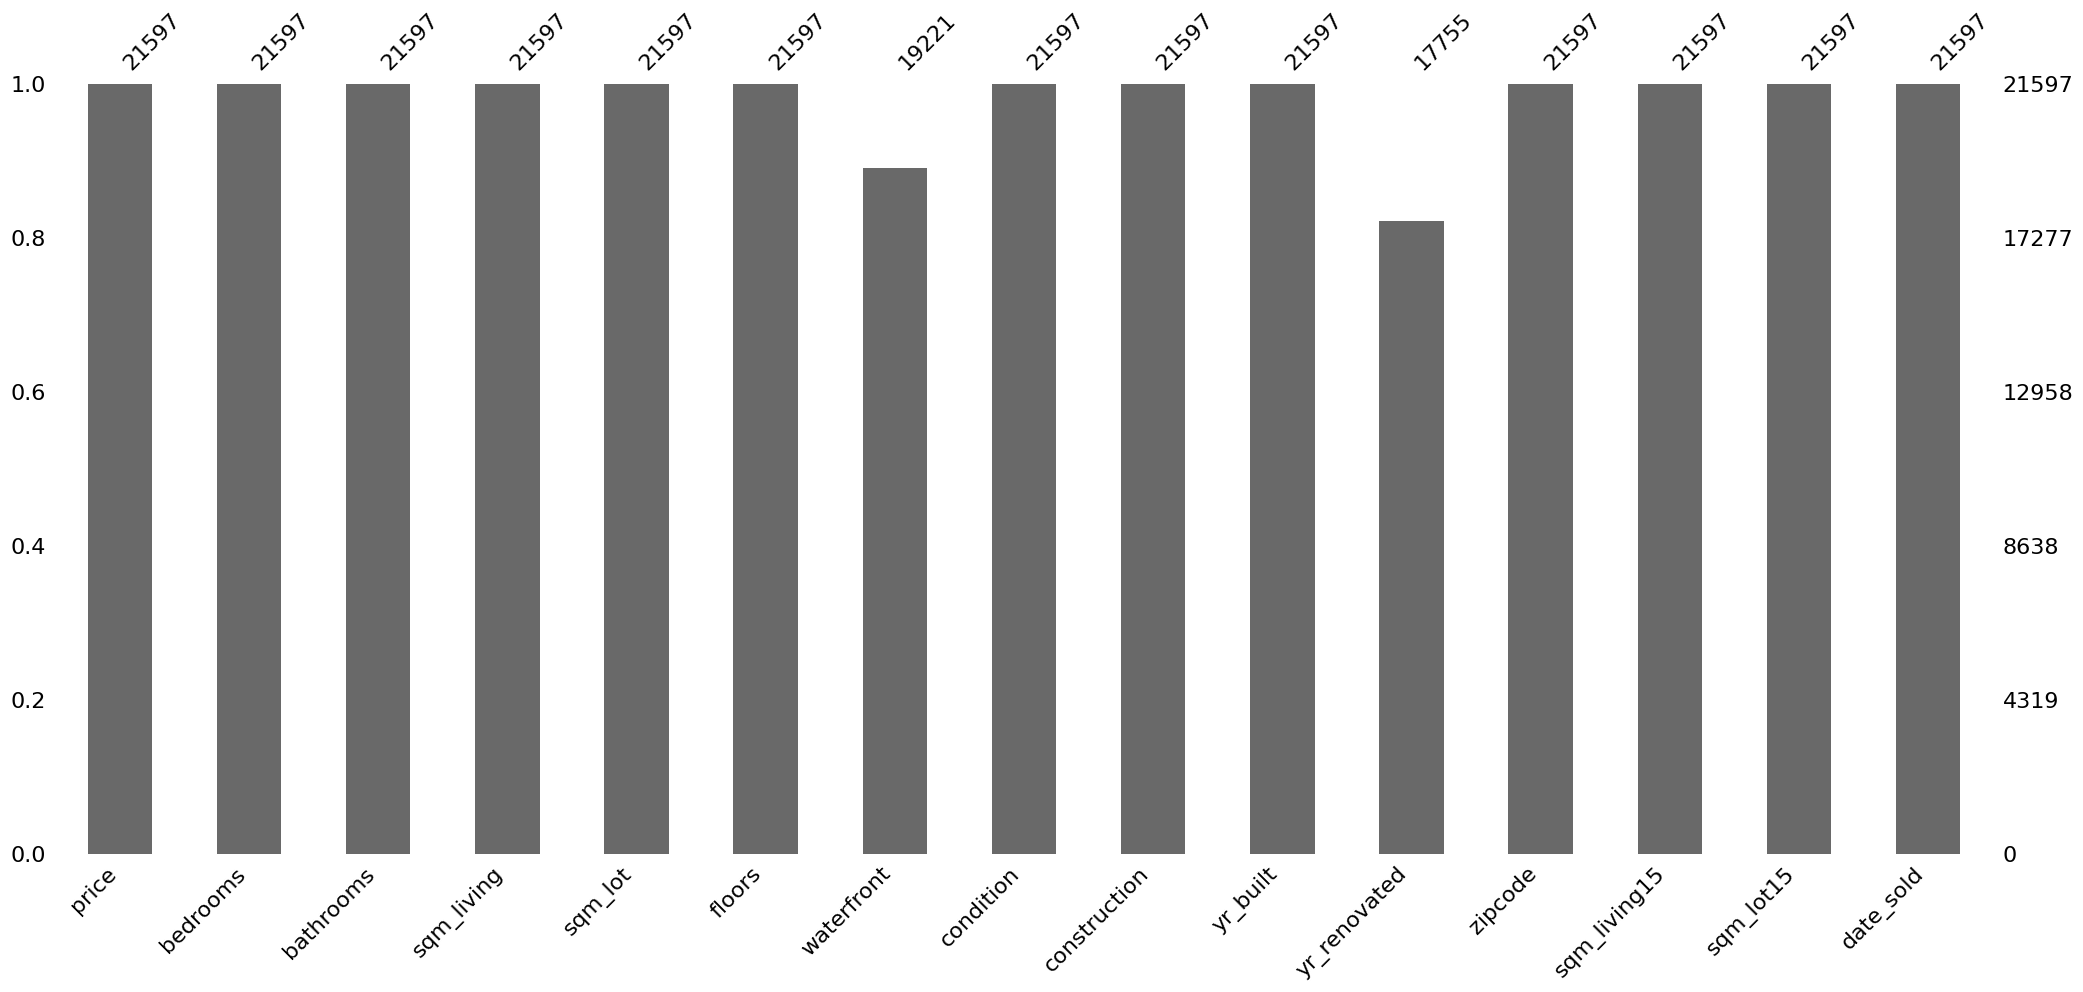

In [267]:
# missing values
# display number of missing values per column
df_kc_housing.isna().sum()

msno.bar(df_kc_housing)
# the column 'waterfront' has approx. 10 percent of missing values, the column 'yr_renovated' approx. 20 percent. 



In [268]:
# my stakeholder has very limited budget and it not interested in a property near the waterfront. In my case, it is best to drop the waterfront-column
# rather then to drop row-wise, as I might loose valuable information:
df_kc_housing = df_kc_housing.drop('waterfront', axis=1)

In [269]:
# the yr_renovated column hold approx. 20% of missing values, so again I would lose a lot of information if I dropped row wise. 
# My stakeholder is not explicitly interested in the year of renovation, but rather in the overall condition of the property. 
# Instead of using yr_renovated, I will use the 'condition'-scale to assess the condition of the property, 
# and am therefore dropping yr_renovated as well:
df_kc_housing = df_kc_housing.drop('yr_renovated', axis=1)


In [270]:
# the data set does not contain missing values
df_kc_housing.isna().sum()



price           0
bedrooms        0
bathrooms       0
sqm_living      0
sqm_lot         0
floors          0
condition       0
construction    0
yr_built        0
zipcode         0
sqm_living15    0
sqm_lot15       0
date_sold       0
dtype: int64

In [271]:
# my client has a large family and very limited budget, he is not interested in lot space. I will calculate the price per square meter
# holding only the living are and not include the lot for one column:

# create a new column for price per sqm:
df_kc_housing['price_sqm_living'] = round(df_kc_housing.price/df_kc_housing.sqm_living, 0)

In [284]:
# and create another column with price per sqm including 25% of the lot as living area:
df_kc_housing['sqm_total'] = round(df_kc_housing.sqm_living + (df_kc_housing.sqm_lot*0.25), 0)
df_kc_housing['price_sqm_total'] = round(df_kc_housing.price/df_kc_housing.sqm_total, 0)
df_kc_housing.drop('sqm_lot', axis=1)

,price,bedrooms,bathrooms,sqm_living,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total
0,221900.000,3,1.000,109,1.000,3,3,1955,98178,124,524,2014-10,2036.000,240.000,925.000
1,538000.000,3,2.250,238,2.000,3,3,1951,98125,157,709,2014-12,2261.000,406.000,1325.000
2,180000.000,2,1.000,71,1.000,3,2,1933,98028,252,748,2015-02,2535.000,303.000,594.000
3,604000.000,4,3.000,182,1.000,5,3,1965,98136,126,464,2014-12,3319.000,298.000,2027.000
4,510000.000,3,2.000,156,1.000,3,3,1987,98074,167,697,2015-02,3269.000,344.000,1483.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,360000.000,3,2.500,142,3.000,3,3,2009,98103,142,140,2014-05,2535.000,168.000,2143.000
21592,400000.000,4,2.500,214,2.000,3,3,2014,98146,170,668,2015-02,1869.000,349.000,1146.000
21593,402101.000,2,0.750,94,2.000,3,3,2009,98144,94,186,2014-06,4278.000,125.000,3217.000
21594,400000.000,3,2.500,148,2.000,3,3,2004,98027,130,119,2015-01,2703.000,203.000,1970.000


In [285]:
df_kc_housing.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total
0,221900.000,3,1.000,109,524,1.000,3,3,1955,98178,124,524,2014-10,2036.000,240.000,925.000
1,538000.000,3,2.250,238,672,2.000,3,3,1951,98125,157,709,2014-12,2261.000,406.000,1325.000
2,180000.000,2,1.000,71,929,1.000,3,2,1933,98028,252,748,2015-02,2535.000,303.000,594.000
3,604000.000,4,3.000,182,464,1.000,5,3,1965,98136,126,464,2014-12,3319.000,298.000,2027.000
4,510000.000,3,2.000,156,750,1.000,3,3,1987,98074,167,697,2015-02,3269.000,344.000,1483.000


In [286]:
# outliers

df_kc_housing.describe(include='all')

# possible outliers may be in the columns: bedrooms, bathrooms, sqm_lot



,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596,21596.000,21596.000,21596.000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2229,NaN,NaN,NaN
mean,540291.957,3.372,2.116,192.768,1402.303,1.494,3.410,2.972,1971.001,98077.951,184.064,1184.803,NaN,2852.476,543.341,1425.879
std,367376.019,0.904,0.769,85.299,3847.414,0.540,0.650,0.447,29.375,53.514,63.664,2533.914,NaN,1189.156,980.252,830.883
min,78000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98001.000,37.000,60.000,NaN,945.000,73.000,7.000
25%,322000.000,3.000,1.750,132.000,468.000,1.000,3.000,3.000,1951.000,98033.000,138.000,473.000,NaN,1969.000,281.000,816.000
50%,450000.000,3.000,2.250,177.000,707.000,1.500,3.000,3.000,1975.000,98065.000,170.000,707.000,NaN,2640.000,361.000,1243.000
75%,645000.000,4.000,2.500,236.000,992.000,2.000,4.000,3.000,1997.000,98118.000,219.000,936.000,NaN,3438.250,478.000,1874.000


In [287]:
# bedrooms:
# when sorting, there is only one property with 33 bedrooms, with the otherwise range 1-11. 
df_kc_housing.bedrooms.sort_values().tail(30)


15232    7 
9650     7 
16298    7 
4713     7 
16721    7 
18959    7 
4020     7 
6168     8 
15056    8 
1658     8 
19286    8 
15656    8 
4063     8 
9068     8 
10946    8 
17220    8 
18461    8 
4031     8 
12872    8 
9443     8 
4092     9 
16829    9 
6073     9 
8537     9 
18427    9 
4231     9 
19238    10
15147    10
13301    10
8748     11
Name: bedrooms, dtype: int64

In [288]:
# Since 33 is very fart apart of 11, I take a closer look at that row:
df_kc_housing.iloc[15856]

price              172500.000
bedrooms            3        
bathrooms          1.000     
sqm_living          105      
sqm_lot             817      
floors             1.000     
condition           3        
construction        3        
yr_built            1972     
zipcode             98001    
sqm_living15        117      
sqm_lot15           1259     
date_sold           2014-05  
price_sqm_living   1643.000  
sqm_total          309.000   
price_sqm_total    558.000   
Name: 15856, dtype: object

In [289]:
df_kc_housing.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total
0,221900.000,3,1.000,109,524,1.000,3,3,1955,98178,124,524,2014-10,2036.000,240.000,925.000
1,538000.000,3,2.250,238,672,2.000,3,3,1951,98125,157,709,2014-12,2261.000,406.000,1325.000
2,180000.000,2,1.000,71,929,1.000,3,2,1933,98028,252,748,2015-02,2535.000,303.000,594.000
3,604000.000,4,3.000,182,464,1.000,5,3,1965,98136,126,464,2014-12,3319.000,298.000,2027.000
4,510000.000,3,2.000,156,750,1.000,3,3,1987,98074,167,697,2015-02,3269.000,344.000,1483.000


In [290]:
# 33 bedrooms with only 150 sqm of living are and 1.75 bathrooms seems implausible, likely an outlier.
# delete the row
df_kc_housing.drop([15856], inplace=True)

# reset index
df_kc_housing.reset_index(inplace=True, drop=True)

In [291]:
# checking column bathrooms for outliers:
df_kc_housing.bathrooms.sort_values().tail(30)

# eight bathrooms seems plausible and do not need to ne considered outliers

2624    5.500
18958   5.500
10362   5.500
3098    5.500
13894   5.500
20215   5.500
3018    5.500
4145    5.500
20434   5.500
7028    5.500
6495    5.750
15737   5.750
4407    5.750
16757   5.750
21032   6.000
12358   6.000
21326   6.000
1313    6.000
19131   6.000
4031    6.000
14542   6.250
18286   6.250
21488   6.500
20560   6.500
4020    6.750
8085    6.750
8537    7.500
9245    7.750
7245    8.000
12764   8.000
Name: bathrooms, dtype: float64

In [292]:
# checking sqm_lot for outliers:
df_kc_housing.sqm_lot.sort_values().tail(30)

# such large lots are rare in the data set, but not unrealistic and do not need to be removed. 

18825    40468 
15918    40468 
13237    40468 
7243     40710 
14674    41196 
8436     42167 
16979    44434 
19074    45850 
9201     46411 
17333    46578 
20403    46821 
2962     46931 
12906    47104 
17560    49573 
17809    50382 
7287     53660 
16172    57950 
13464    59569 
12993    66489 
4536     78345 
9705     80936 
20434    80936 
7070     81907 
6685     85509 
4437     91255 
3945     91322 
7762     95138 
7640     99797 
17303    108212
1717     153414
Name: sqm_lot, dtype: int64

In [293]:
df_kc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   price             21595 non-null  float64  
 1   bedrooms          21595 non-null  int64    
 2   bathrooms         21595 non-null  float64  
 3   sqm_living        21595 non-null  int64    
 4   sqm_lot           21595 non-null  int64    
 5   floors            21595 non-null  float64  
 6   condition         21595 non-null  int64    
 7   construction      21595 non-null  int64    
 8   yr_built          21595 non-null  int64    
 9   zipcode           21595 non-null  int64    
 10  sqm_living15      21595 non-null  int64    
 11  sqm_lot15         21595 non-null  int64    
 12  date_sold         21595 non-null  period[M]
 13  price_sqm_living  21595 non-null  float64  
 14  sqm_total         21595 non-null  float64  
 15  price_sqm_total   21595 non-null  float64  
dtypes: f

In [297]:
df_kc_housing.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total
0,221900.000,3,1.000,109,524,1.000,3,3,1955,98178,124,524,2014-10,2036.000,240.000,925.000
1,538000.000,3,2.250,238,672,2.000,3,3,1951,98125,157,709,2014-12,2261.000,406.000,1325.000
2,180000.000,2,1.000,71,929,1.000,3,2,1933,98028,252,748,2015-02,2535.000,303.000,594.000
3,604000.000,4,3.000,182,464,1.000,5,3,1965,98136,126,464,2014-12,3319.000,298.000,2027.000
4,510000.000,3,2.000,156,750,1.000,3,3,1987,98074,167,697,2015-02,3269.000,344.000,1483.000


In [296]:
# my clients budget is limited to property in the lowest 15% of the price range
# creating a subset to only hold 'affordable' property:

np.percentile(df_kc_housing['price_sqm_living'], 85)

3995.0

In [298]:
df_kc_housing.zipcode.nunique()

70

In [299]:
df_kc_housing.describe()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,price_sqm_living,sqm_total,price_sqm_total
count,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000
mean,540308.988,3.372,2.116,192.772,1402.330,1.494,3.410,2.972,1971.001,98077.954,184.067,1184.799,2852.532,543.352,1425.919
std,367376.000,0.904,0.769,85.299,3847.501,0.540,0.650,0.447,29.376,53.513,63.663,2533.972,1189.155,980.273,830.881
min,78000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98001.000,37.000,60.000,945.000,73.000,7.000
25%,322000.000,3.000,1.750,132.000,468.000,1.000,3.000,3.000,1951.000,98033.000,138.000,473.000,1969.000,281.000,816.000
50%,450000.000,3.000,2.250,177.000,707.000,1.500,3.000,3.000,1975.000,98065.000,170.000,707.000,2640.000,361.000,1243.000
75%,645000.000,4.000,2.500,236.000,992.000,2.000,4.000,3.000,1997.000,98118.000,219.000,936.000,3438.500,478.000,1874.000
max,7700000.000,11.000,8.000,1257.000,153414.000,3.500,5.000,5.000,2015.000,98199.000,576.000,80936.000,8750.000,38474.000,6582.000


In [ ]:

fixed_acidity_bins = np.arange(4, 17)
fixed_acidity_series = pd.cut(red_wines_df['fixed acidity'], bins=fixed_acidity_bins, 
                              labels=fixed_acidity_bins[:-1])
fixed_acidity_series.name = 'fa_bin'
red_wines_df = pd.concat([red_wines_df, fixed_acidity_series], axis=1)


In [315]:
bins = [98001, 98004, 98009, 98199]
labels = [0, 1, 0]
df_kc_housing['fam_friend'] = pd.cut(
    df_kc_housing.zipcode,
    bins = bins,
    labels=labels,
    ordered=False,
    include_lowest=True
)
#df_kc_housing['fam_friend'] = df_kc_housing.fam_friend.cat.add_categories('Unknown').fillna('Unknown')

In [319]:
df_kc_housing.query('zipcode == 98006 and fam_friend == 0')

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total,fam_friend


In [307]:
df_kc_housing.describe(include='all')

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,sqm_living15,sqm_lot15,date_sold,price_sqm_living,sqm_total,price_sqm_total,fam_friend
count,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595.000,21595,21595.000,21595.000,21595.000,21595
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2229,NaN,NaN,NaN,20505
mean,540308.988,3.372,2.116,192.772,1402.330,1.494,3.410,2.972,1971.001,98077.954,184.067,1184.799,NaN,2852.532,543.352,1425.919,NaN
std,367376.000,0.904,0.769,85.299,3847.501,0.540,0.650,0.447,29.376,53.513,63.663,2533.972,NaN,1189.155,980.273,830.881,NaN
min,78000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98001.000,37.000,60.000,NaN,945.000,73.000,7.000,NaN
25%,322000.000,3.000,1.750,132.000,468.000,1.000,3.000,3.000,1951.000,98033.000,138.000,473.000,NaN,1969.000,281.000,816.000,NaN
50%,450000.000,3.000,2.250,177.000,707.000,1.500,3.000,3.000,1975.000,98065.000,170.000,707.000,NaN,2640.000,361.000,1243.000,NaN
75%,645000.000,4.000,2.500,236.000,992.000,2.000,4.000,3.000,1997.000,98118.000,219.000,936.000,NaN,3438.500,478.000,1874.000,NaN
